https://www.kaggle.com/competitions/playground-series-s5e4

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
original_df = pd.read_csv('original.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [4]:
train_df.isna().sum() / len(train_df)

id                             0.000000
Podcast_Name                   0.000000
Episode_Title                  0.000000
Episode_Length_minutes         0.116124
Genre                          0.000000
Host_Popularity_percentage     0.000000
Publication_Day                0.000000
Publication_Time               0.000000
Guest_Popularity_percentage    0.194707
Number_of_Ads                  0.000001
Episode_Sentiment              0.000000
Listening_Time_minutes         0.000000
dtype: float64

In [5]:
train_df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,662907.0,64.504738,32.969603,0.0,35.73000,63.84000,94.07000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,603970.0,52.236449,28.451241,0.0,28.38000,53.58000,76.60000,119.91
Number_of_Ads,749999.0,1.348855,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [6]:
train_df.select_dtypes(include=['object']).nunique()

Podcast_Name          48
Episode_Title        100
Genre                 10
Publication_Day        7
Publication_Time       4
Episode_Sentiment      3
dtype: int64

In [7]:
cols_num = train_df.select_dtypes(include=['int64', 'float64']).columns
cols_cat = train_df.select_dtypes(include=['object']).columns

## Numeric

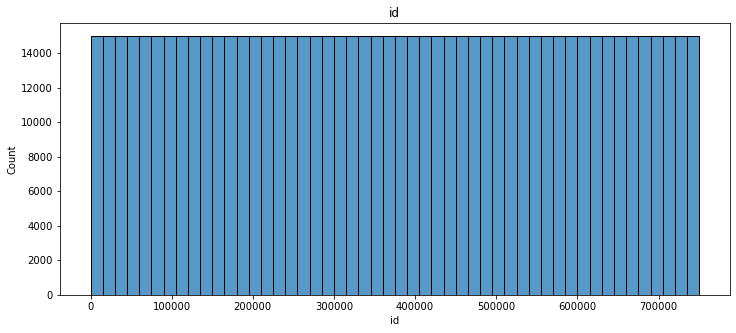

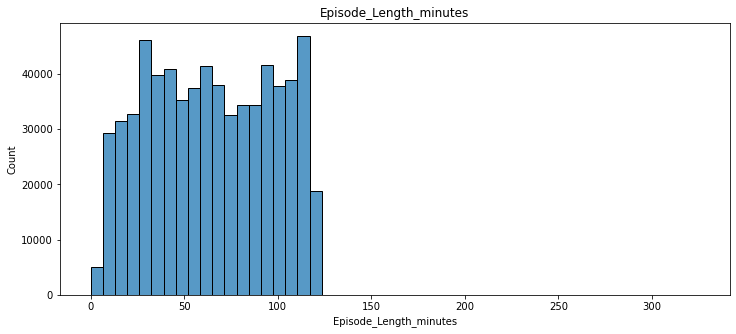

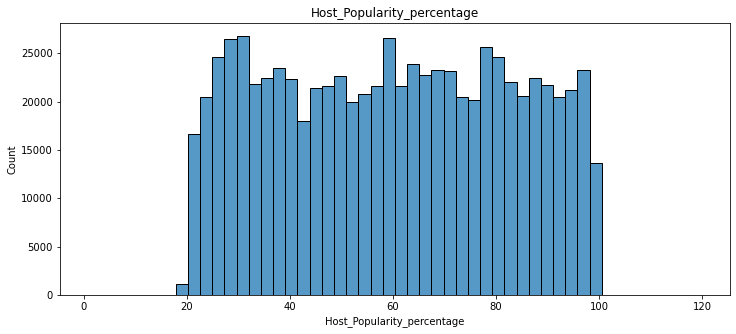

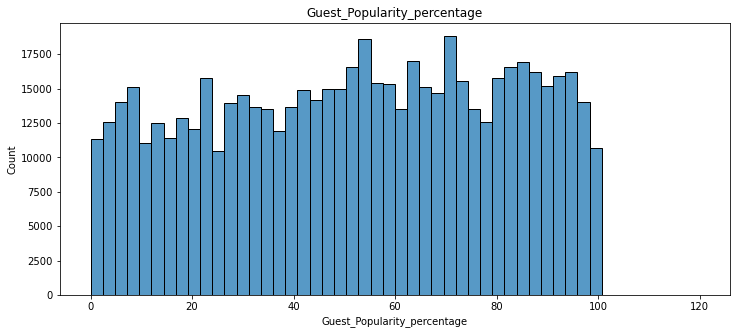

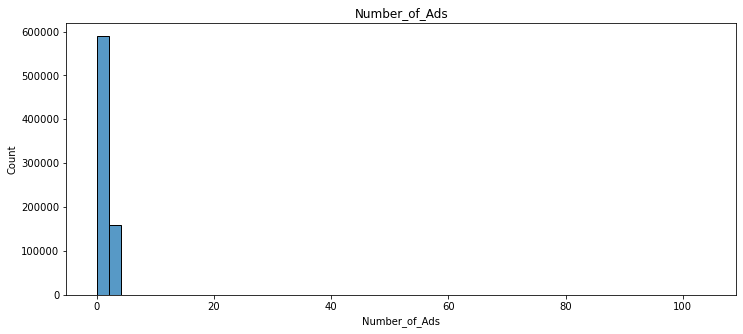

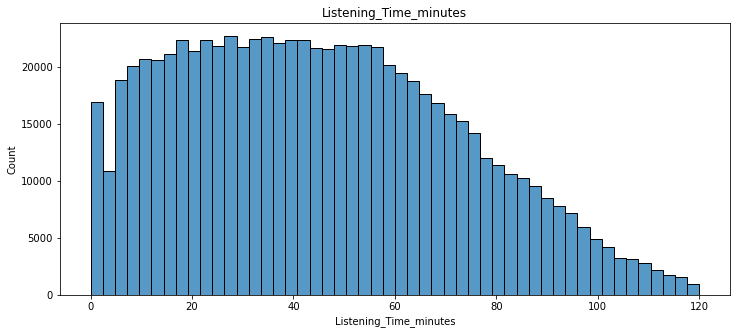

In [8]:
for col in cols_num:
    
    plt.figure(figsize=(12,5))
    sns.histplot(x=train_df[col], bins=50)
    plt.title(col)
    plt.show()

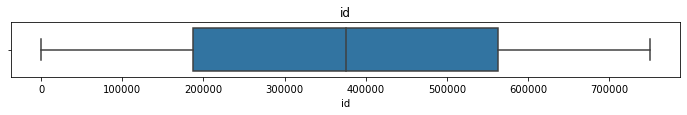

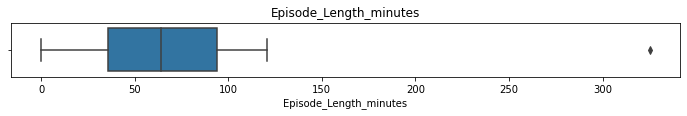

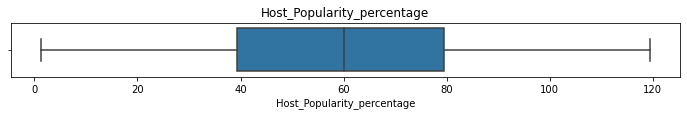

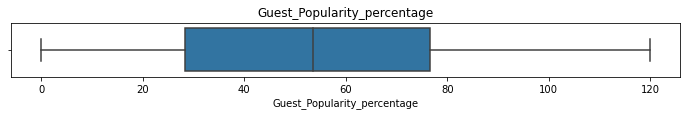

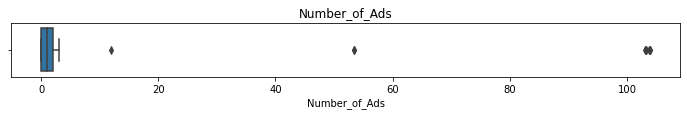

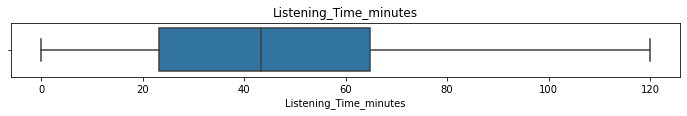

In [9]:
for col in cols_num:
    
    plt.figure(figsize=(12,1))
    sns.boxplot(x=train_df[col])
    plt.title(col)
    plt.show()

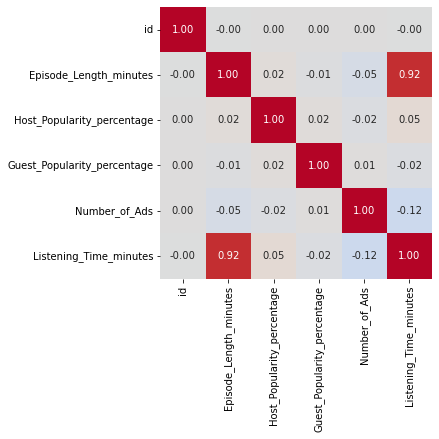

In [10]:
plt.figure(figsize=(12,5))
sns.heatmap(data=train_df[cols_num].corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, square=True)
plt.show()

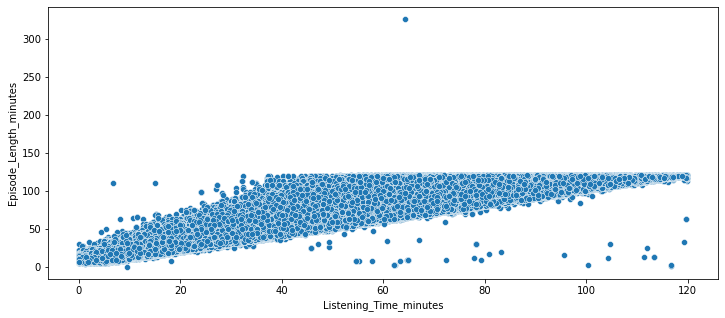

In [11]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train_df[cols_num], x='Listening_Time_minutes', y='Episode_Length_minutes')
plt.show()

In [19]:
len(train_df[(train_df['Listening_Time_minutes']-1)>train_df['Episode_Length_minutes']] )/ len(train_df)

0.0005106666666666666

## CAtegorial

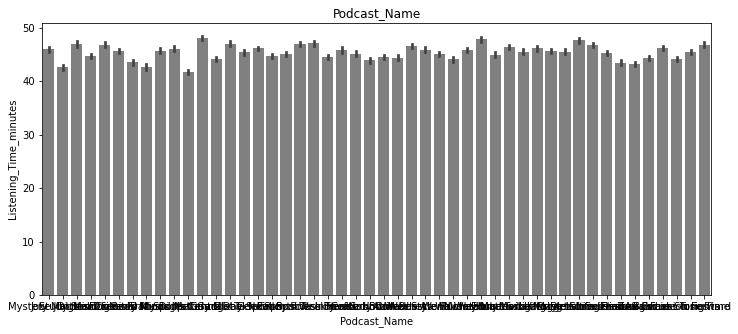

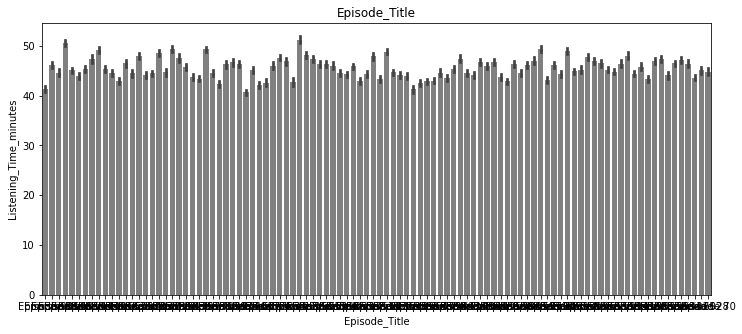

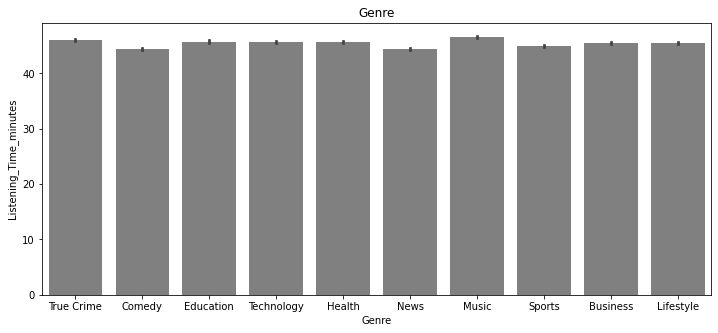

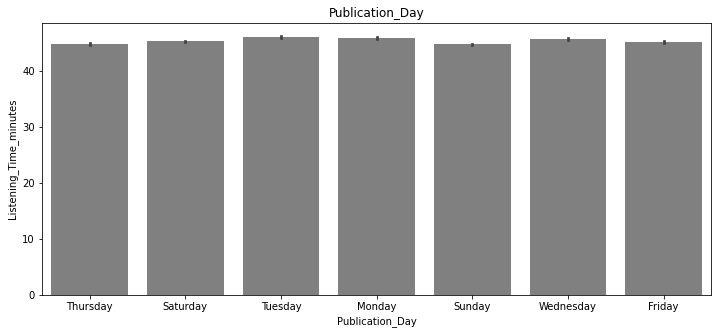

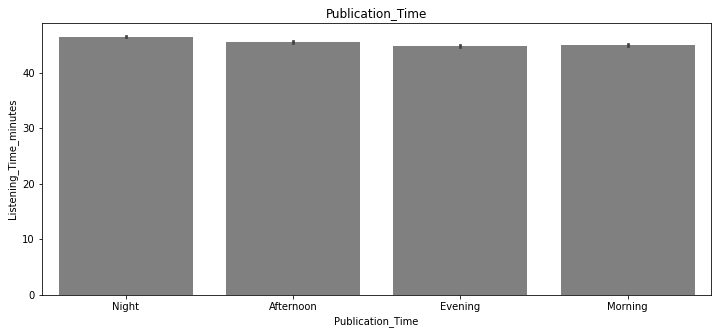

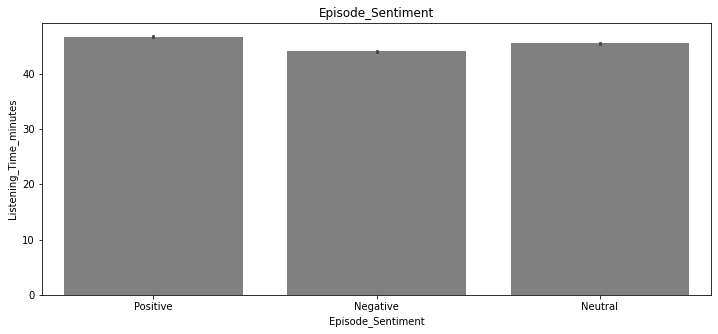

In [20]:
for col in cols_cat:
    plt.figure(figsize=(12,5))
    sns.barplot(data=train_df, x=col, y='Listening_Time_minutes', color='gray', estimator=np.mean)
    plt.title(col)
    plt.show()

In [30]:
train_df['Episode_Sentiment'].value_counts(1)

Neutral     0.335055
Negative    0.333488
Positive    0.331457
Name: Episode_Sentiment, dtype: float64